In [2]:
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2

In [3]:
import os
from collections import defaultdict
import numpy as np

In [4]:
data_folder =os.path.join(os.path.expanduser('~'), '.cache/MSMARCO')
qrel_filepath = os.path.join(data_folder, 'queries.train.tsv')
queriesText=defaultdict(str)
pidFreq=defaultdict(int)
pidList=[]
with open(qrel_filepath) as fIn:
    for line in fIn:
        qid,query = line.strip().split('\t')
        queriesText[qid]=query
        # pidList.append(pid)

In [5]:
data_folder =os.path.join(os.path.expanduser('~'), '.cache/MSMARCO')
qrel_filepath = os.path.join(data_folder, 'qrels.train.tsv')
pidFreq=defaultdict(int)
pidQuery=defaultdict(list)
pidList=[]
qidFreq=defaultdict(int)
with open(qrel_filepath) as fIn:
    for line in fIn:
        qid,_,pid, rel = line.strip().split('\t')
        pidFreq[pid]+=1
        qidFreq[qid]+=1
        pidQuery[pid].append(queriesText[qid])
        pidList.append(pid)

In [102]:
qhist, qbins=np.histogram(np.array(list(qidFreq.values())),bins=6)
print(qhist, qbins)
print(len(qidFreq))

[477580  21868   2718    612    131     30] [1. 2. 3. 4. 5. 6. 7.]
502939


In [100]:
hist, bins=np.histogram(np.array(list(pidFreq.values())),bins=16)
# pidset,pidFreqDist=np.unique(np.array(pidList),return_index=True)
# freq2pid={freq:pid }
print(hist, bins)

[503187  11328   1396    343    115     42     27     14      7      3
      1      1      2      4      1      1] [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


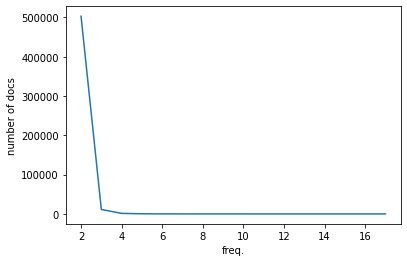

In [101]:
import matplotlib.pyplot as plt
plt.plot(bins[1:],hist)
plt.ylabel('number of docs')
plt.xlabel('freq.')
plt.show()

In [60]:
freq2pid=defaultdict(list)
for pid in pidQuery:
    freq2pid[len(pidQuery[pid])].append(pid)
print(freq2pid.keys())

dict_keys([1, 2, 3, 5, 4, 14, 6, 7, 10, 8, 9, 15, 17, 12, 11, 13])


In [118]:
pids=freq2pid[4]
# print(pids)
print(pidQuery[pids[0]])
# pidQuery

['how much is does it cost to insure a house', 'how much is homeowners insurance average', 'how to estimate homeowners insurance', 'average price of home insurance']


In [6]:
data_folder =os.path.join(os.path.expanduser('~'), '.cache/MSMARCO')
qrel_filepath = os.path.join(data_folder, 'qrels.dev.tsv')
pidFreqDev=defaultdict(int)
pidQueryDev=defaultdict(list)
pidList=[]
qidFreqDev=defaultdict(int)
with open(qrel_filepath) as fIn:
    for line in fIn:
        qid,_,pid, rel = line.strip().split('\t')
        pidFreqDev[pid]+=1
        qidFreqDev[qid]+=1
        pidQueryDev[pid].append(queriesText[qid])
        pidList.append(pid)

In [125]:
hist, bins=np.histogram(np.array(list(pidFreqDev.values())),bins=2)
# pidset,pidFreqDist=np.unique(np.array(pidList),return_index=True)
# freq2pid={freq:pid }
print(hist, bins)

[58925   171] [1. 2. 3.]


In [131]:
traing=np.array(list(pidFreq.keys()))
dev=np.array(list(pidFreqDev.keys()))
# print(pidFreq.keys(),pidFreqDev.keys())
intersect=np.intersect1d(traing,dev)
print(len(intersect),len(traing),len(dev))

2287 516472 59096


In [22]:
# data_folder =os.path.join(os.path.expanduser('~'), '.cache/MSMARCO')
# qrel_filepath = os.path.join(data_folder, 'qrels.dev.tsv')
qrel_filepath="/home/taoyang/research/sharedData/MSMARCO_DL19Pass/2019qrels-pass.txt"
pidFreq19=defaultdict(int)
qidFreq19=defaultdict(int)
pidQuery19=defaultdict(list)
pidqid19=defaultdict(list)
pidList=[]
qidpid19=defaultdict(list)
qidDict=defaultdict(int)
with open(qrel_filepath) as fIn:
    for line in fIn:
        qid,_,pid, rel = line.strip().split(' ')
        qidDict[qid]+=1
        if int(rel)>0:
            pidFreq19[pid]+=1
            qidFreq19[qid]+=1
            pidQuery19[pid].append(queriesText[qid])
            qidpid19[qid].append(pid)
            pidList.append(pid)

In [23]:
len(qidDict)

43

In [25]:
print(qidFreq19,len(qidFreq19.keys()))

defaultdict(<class 'int'>, {'19335': 20, '47923': 112, '87181': 83, '87452': 81, '104861': 141, '130510': 28, '131843': 64, '146187': 23, '148538': 101, '156493': 133, '168216': 289, '182539': 53, '183378': 229, '207786': 24, '264014': 211, '359349': 56, '405717': 35, '443396': 94, '451602': 154, '489204': 96, '490595': 55, '527433': 75, '573724': 69, '833860': 75, '855410': 4, '915593': 92, '962179': 25, '1037798': 13, '1063750': 276, '1103812': 31, '1106007': 60, '1110199': 35, '1112341': 142, '1113437': 77, '1114646': 52, '1114819': 341, '1115776': 24, '1117099': 119, '1121402': 46, '1121709': 12, '1124210': 139, '1129237': 28, '1133167': 285}) 43


In [136]:
traing=np.array(list(pidFreq.keys()))
dev=np.array(list(pidFreq19.keys()))
# print(pidFreq.keys(),pidFreqDev.keys())
intersect=np.intersect1d(traing,dev)
print(len(intersect),len(traing),len(dev))

354 516472 4102


In [ ]:
DL19queries

In [43]:
traing=np.array(list(pidFreq.keys()))
for qid in qidpid19:
    
    dev=np.array(qidpid19[qid])
    # print(pidFreq.keys(),pidFreqDev.keys())
    intersect=np.intersect1d(traing,dev)
    
    candidatePid=candidateSet[str(qid)]
    intersectTotal=np.intersect1d(traing,candidatePid)
    print(len(intersect),len(traing),len(dev),"---",len(intersectTotal),len(candidatePid))
    queriesAccodingPid=[pidQuery[intersectI] for intersectI in intersect  ]
    print(DL19queries[qid],queriesAccodingPid)

1 516472 20 --- 118 1000
anthropological definition of environment [['anthropology definition of worldview']]
11 516472 112 --- 67 1000
axon terminals or synaptic knob definition [['definition of terminal buttons'], ['waht are outgoing signals on neurons called'], ['what part of a neuron receives signals'], ['what isthe junction between an axon terminal and the next neuron'], ['what occurs in the synapse between neurons'], ['which part(s) of the neuron can conduct an action potential?', 'how is action potential generated and propagated along neurons'], ['axon terminal definition'], ['chemical signals diffuse between neurons at this location'], ['_______ are specialized cells that conduct impulses through the nervous system.'], ['medical definition of synaptic knob'], ['what is the term used to describe the bulbs located at the end of the axon']]
4 516472 83 --- 63 1000
causes of left ventricular hypertrophy [['what is the cause of ventricular hypertrophy'], ['which factor is responsibl

KeyboardInterrupt: 

In [29]:
traing=np.array(list(pidFreq.keys()))
traingset=set(traing.flatten())


In [37]:
from eval import qrels2Evaluator,loadEvalRanklist
# import random
dataName="DL19"
from tqdm import tqdm
evaluator=qrels2Evaluator(dataName,metrics={'ndcg_cut.10'})
candidateSet,DL19queries,Corpus=loadEvalRanklist(dataName)
run={}
for qid in tqdm(candidateSet):
    if str(qid) not in qidFreq19:
        continue
    print(qid,str(qid) not in qidFreq19)
    run[qid]={}
    for pid in candidateSet[qid]:
        # print(pid,str(pid) in traing)
        score=1 if str(pid) in traingset else 0
        score+=np.random.rand()*0.01
        run[qid][pid]=float(score)

100%|██████████| 200/200 [00:00<00:00, 3220.16it/s]

131843 False
1114646 False
915593 False
87452 False
1037798 False
183378 False
1117099 False
833860 False
1121402 False
1103812 False
489204 False
1113437 False
962179 False
490595 False
1124210 False
264014 False
573724 False
47923 False
148538 False
182539 False
87181 False
443396 False
1112341 False
359349 False
1110199 False
19335 False
1106007 False
168216 False
451602 False
405717 False
1115776 False
207786 False
1063750 False
1114819 False
527433 False
104861 False
1133167 False
146187 False
156493 False
1129237 False
130510 False
1121709 False
855410 False


In [33]:
import pytrec_eval
EvalResults=evaluator.evaluate(run)
AggResults= defaultdict(list)
RealCalMetrics=list(EvalResults.values())[0].keys()
for measure in sorted(RealCalMetrics):
    AggResults[dataName+measure].append(pytrec_eval.compute_aggregated_measure(
            measure,
            [query_measures[measure]
                for query_measures in EvalResults.values()]))
print(AggResults)

defaultdict(<class 'list'>, {'DL19ndcg_cut_10': [0.06383394851296931]})
